# **Visualize Dataset**

## Objectives

* The objective is to predict bike rental usage based on inputs such as temperature, humidity, wind speed... etc. 

## Inputs

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
    1. Clear, Few clouds, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)


## Outputs

* cnt: count of total rental bikes including both casual and registered  

## Additional Comments

* Data Reference:

This Hadi Fanaee-T
Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal 


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/BikeSharingRental/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/BikeSharingRental'

# Import Libraries

In [4]:
! pip install tensorflow==2.2.0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Inspect data

In [5]:
bike = pd.read_csv('inputs/datasets/raw/bike_sharing_daily.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


<AxesSubplot:>

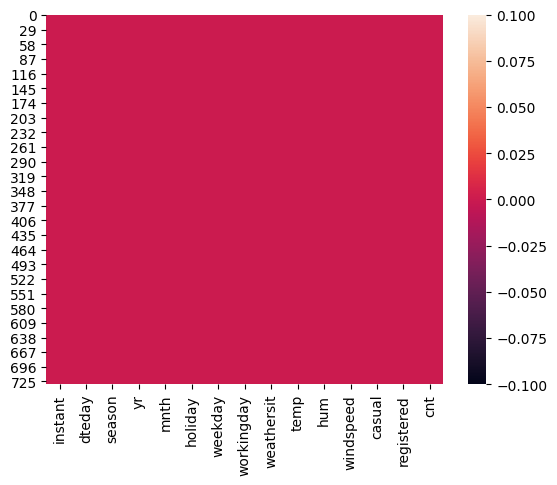

In [6]:
sns.heatmap(bike.isnull())

In [7]:
bike = bike.drop(labels= ['instant'], axis=1)

In [8]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [9]:
bike = bike.drop(labels= ['casual', 'registered'], axis = 1)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [10]:
bike.dteday = pd.to_datetime(bike.dteday, format= '%m/%d/%Y')
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [11]:
bike.index = pd.DatetimeIndex(bike.dteday)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [12]:
bike = bike.drop(labels= ['dteday'], axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


* Print out the cnt Weekly

Text(0, 0.5, 'Bike Rental')

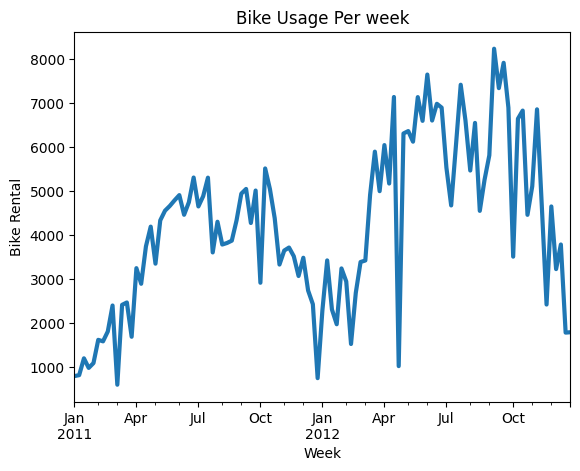

In [13]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike Usage Per week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

* Bike usage per Month

Text(0, 0.5, 'Bike Rental')

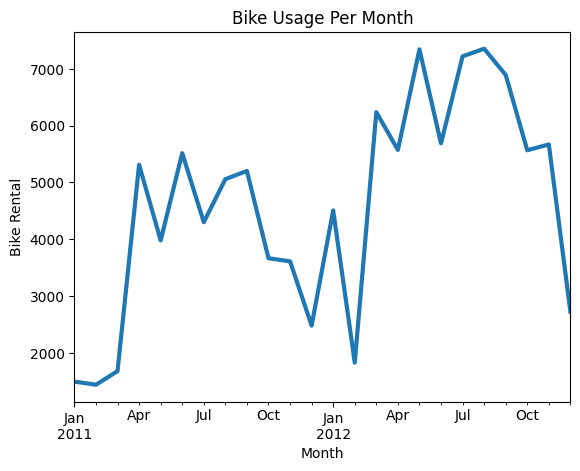

In [14]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike Usage Per Month')
plt.xlabel('Month')
plt.ylabel('Bike Rental')

* Bike usage Per Quarter

Text(0, 0.5, 'Bike Rental')

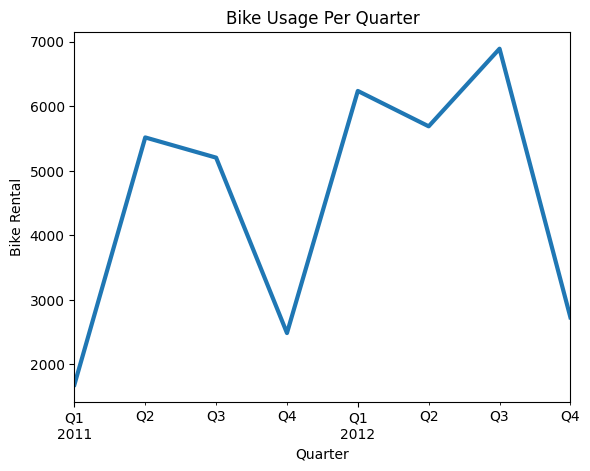

In [15]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')

# Visualise the entire Data

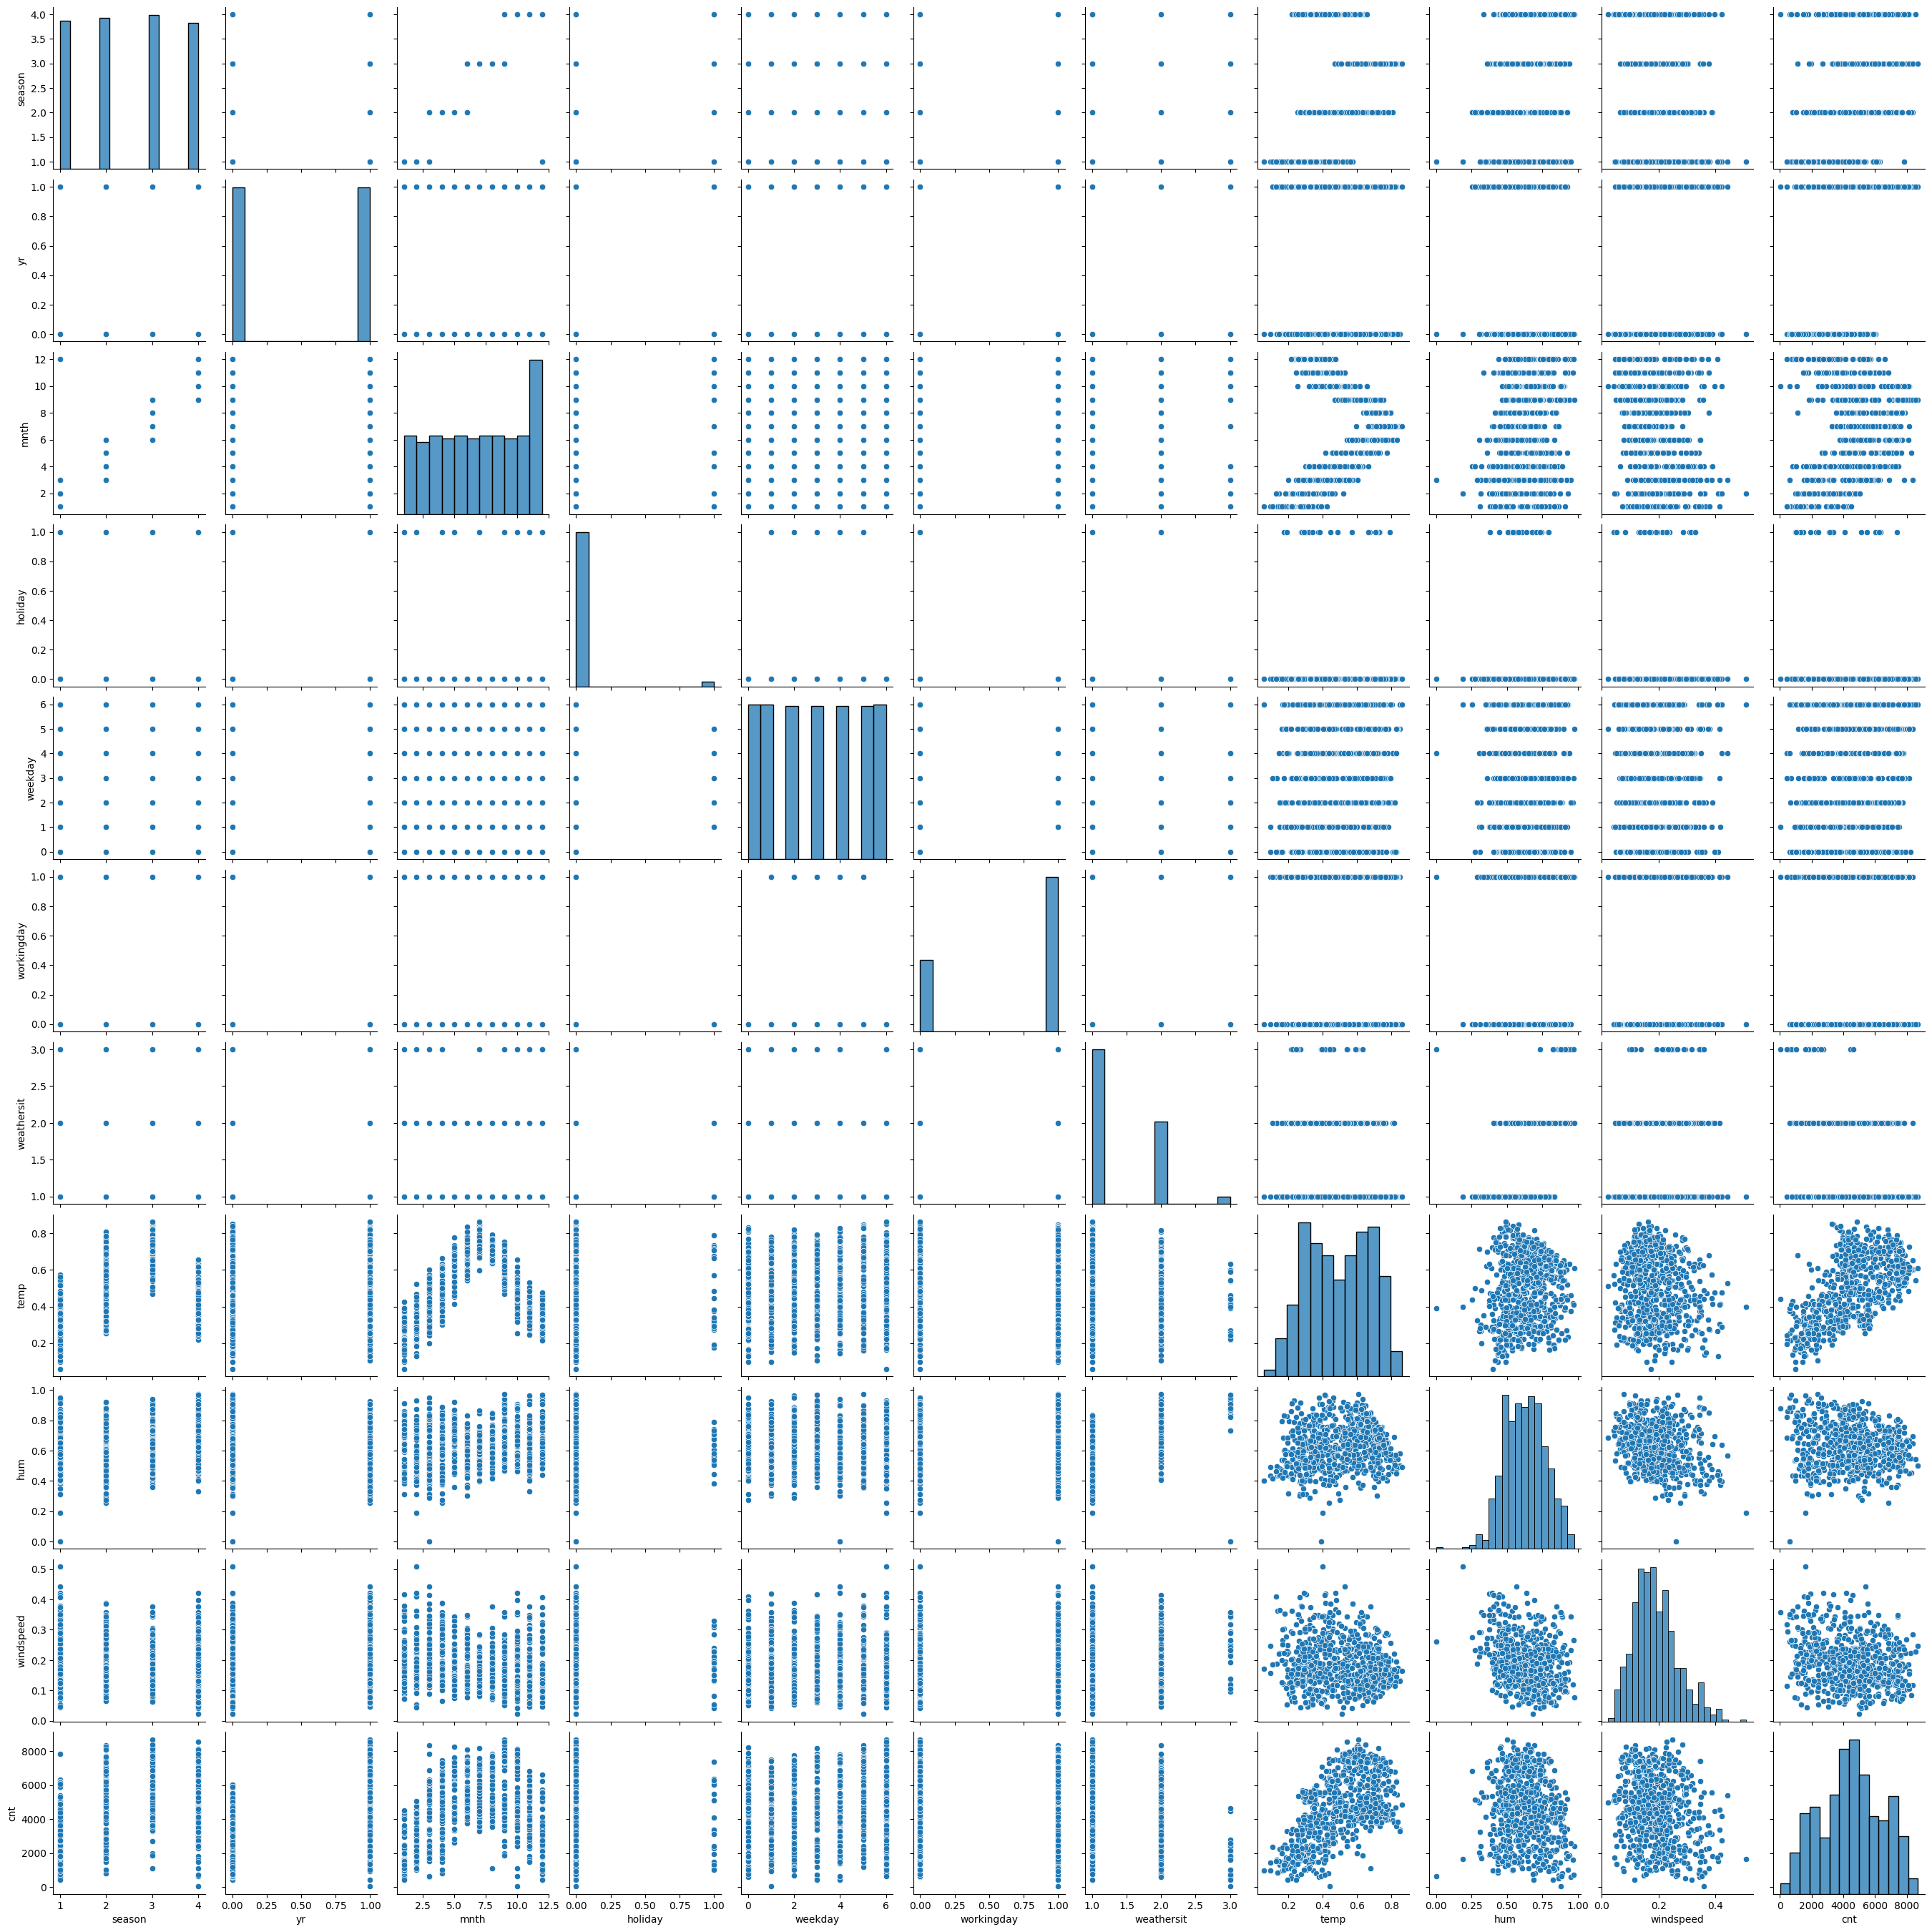

In [16]:
sns.pairplot(bike)

* Devide Data into Numerical and Categorical

In [17]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [18]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


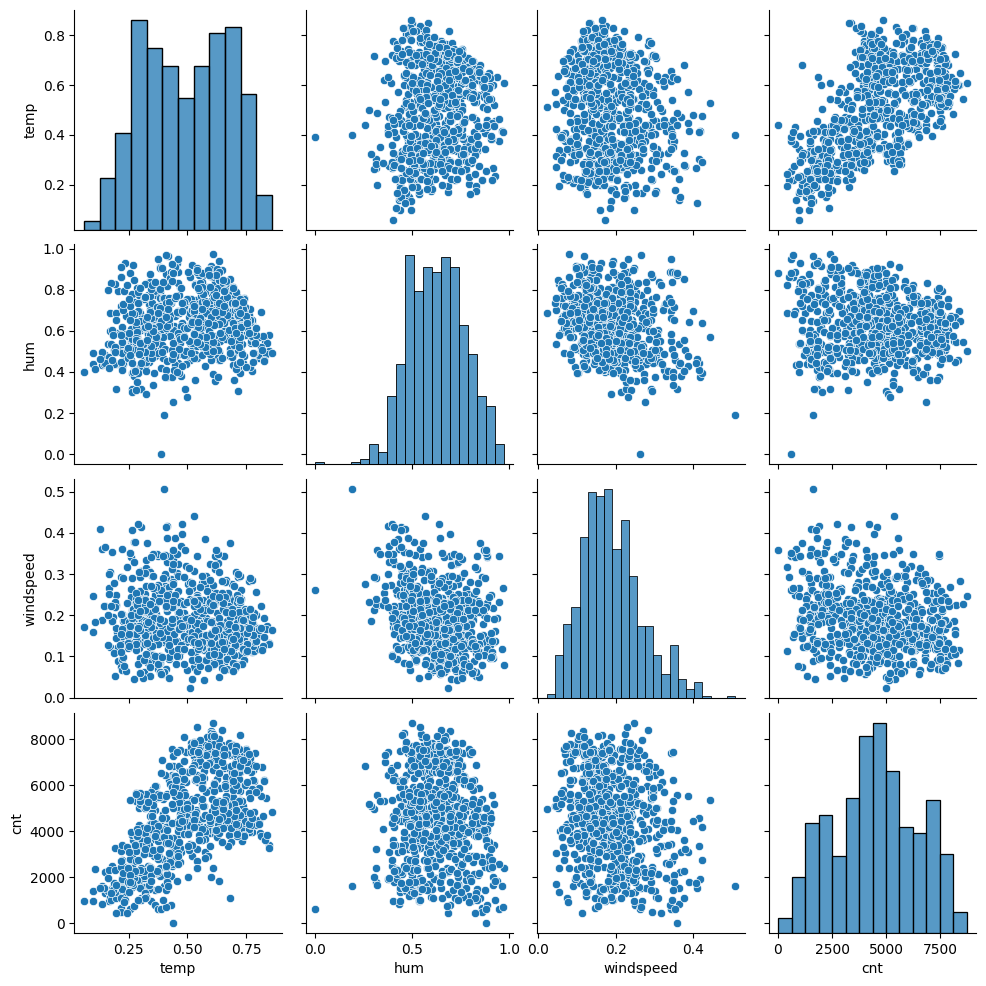

In [19]:
sns.pairplot(X_numerical)

* Use Correlation

<AxesSubplot:>

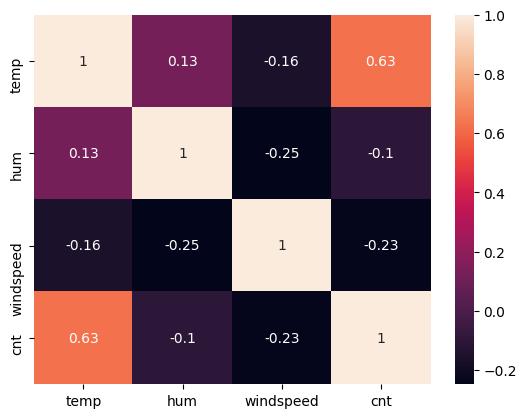

In [20]:
sns.heatmap(X_numerical.corr(), annot =True)

<hr>

# **CREATE TRAINING AND TESTING DATASET**

In [21]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [22]:
X_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


* Encode Data

In [23]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [24]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [25]:
X_cat.shape

(731, 32)

* Convert to DataFrame

In [26]:
X_cat = pd.DataFrame(X_cat)

In [27]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


* Reset dhe index and Concationate

In [28]:
X_numerical = X_numerical.reset_index()

In [29]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [30]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-27,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-28,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2012-12-29,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2012-12-30,0.255833,0.483333,0.350754,1796


* Drop Datetime column

In [31]:
X_all = X_all.drop('dteday', axis = 1)

In [32]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


* Convert Data

In [33]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1:].values

In [34]:
X.shape

(731, 35)

In [35]:
y.shape

(731, 1)

* Normalize the data for cnt

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

* Divide data into 80% for Training and 20% for Testing

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
X_train.shape

(584, 35)

In [39]:
X_test.shape

(147, 35)

<hr>

# **Train the model**

In [40]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

2023-04-03 10:46:08.647377: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-03 10:46:08.647437: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-03 10:46:08.647463: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (xh3ni-bikesharingrenta-cqfzv12rpsm): /proc/driver/nvidia/version does not exist
2023-04-03 10:46:08.647824: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-04-03 10:46:08.660413: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2449995000 Hz
2023-04-03 10:46:08.661812: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa264000b60 initialized for platform Host (this

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='Adam', loss='mean_squared_error')

* Fit Training Data through the models

In [43]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split = 0.2)

Epoch 1/25
10/10 [==============================] - 0s 21ms/step - loss: 0.1130 - val_loss: 0.0408
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0253 - val_loss: 0.0120
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.0105
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0111
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.0077
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0077
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0075
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0075
Epoch 11/25
10/10 

<hr>

# **Evaluate the Model**

In [44]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

* Plot the loss

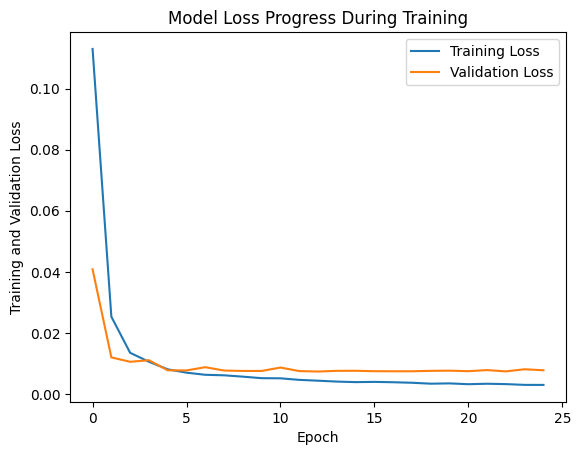

In [45]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

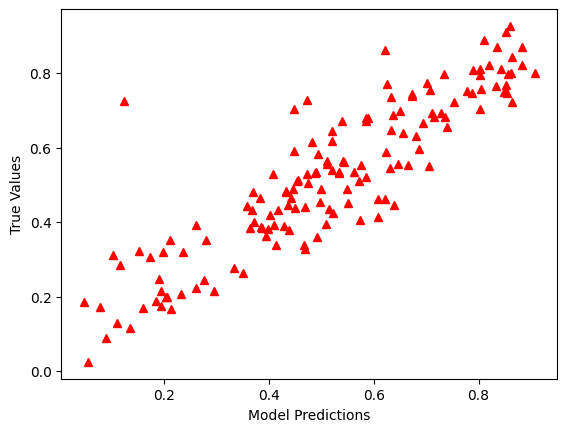

In [46]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

* See the true values before Normalization

In [47]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

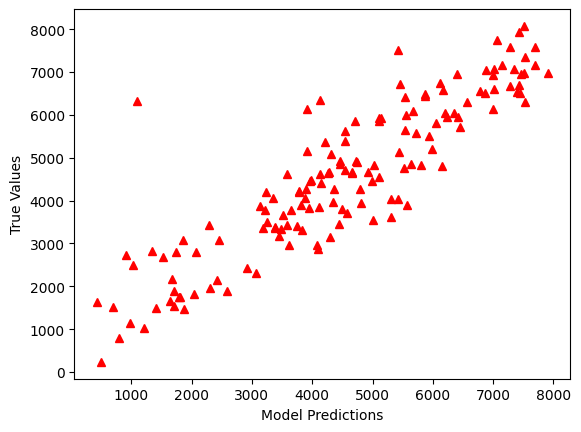

In [48]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

* Evaluate the Model using MSE, RMSE, R<sup>2</sup>

Obtain how many independent parameters do I have

In [49]:
k = X_test.shape[1]
k

35

In [50]:
n = len(X_test)
n

147

In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
RMSE

875.304

In [52]:
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig) 
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 875.304 
MSE = 766157.5895803362 
MAE = 633.2601613155027 
R2 = 0.7882001522499189 
Adjusted R2 = 0.7214164164728663


# Push files to Repo

In [53]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)

bike.to_csv(f"outputs/datasets/collection/bike_sharing_daily.csv", index=False)


[Errno 17] File exists: 'outputs/datasets/collection'
